***DATA LOADING***

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [139]:
from google.colab import files
files.upload()

Saving Housing.csv to Housing (3).csv


{'Housing (3).csv': b'price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus\r\n13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished\r\n12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished\r\n12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished\r\n12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished\r\n11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished\r\n10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished\r\n10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished\r\n10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished\r\n9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished\r\n9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished\r\n9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished\r\n9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished\r\n9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished\r\n9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished\r\n9240000,7800,3,2,2,yes,no,no,n

In [140]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [141]:
df.shape

(545, 13)

In [142]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [143]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


***DATA PREPROCESSING***

In [144]:
df.isnull().sum().sum()

0

In [145]:
df.duplicated().sum()

0

Encoding categorical variables





In [146]:
cols_to_encode = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
df[cols_to_encode] = df[cols_to_encode].apply(LabelEncoder().fit_transform)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


Feature Engineering

In [177]:
df['price_per_area'] = df['price'] / df['area']
df['bed_bath_interaction'] = df['bedrooms'] * df['bathrooms']
df['log_price'] = np.log(df['price'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_area,bed_bath_interaction,log_price
0,9205000.0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,0,1,1.517692,1,-1.406286,8.794085e+06,1.995398,16.035257
1,9205000.0,1.757010,1.403419,4.409809,1.955120,0.405623,-0.465315,-0.734539,0,1,2.098551,0,-1.406286,5.239015e+06,6.188812,16.035257
2,9205000.0,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,0,0,1.517692,1,-0.091662,4.149700e+06,0.067221,16.035257
3,9205000.0,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,0,1,2.098551,1,-1.406286,8.494643e+06,1.995398,16.035257
4,9205000.0,1.046726,1.403419,-0.570187,0.224410,0.405623,-0.465315,1.361397,0,1,1.517692,0,-1.406286,8.794085e+06,-0.800211,16.035257


Scaling Numerical Features

In [178]:
cols_to_scale = ['area','bedrooms','bathrooms','stories','parking','mainroad','guestroom','basement','furnishingstatus','price_per_area','bed_bath_interaction','log_price']
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_area,bed_bath_interaction,log_price
0,9205000.0,1.156583,1.506093,1.436585,1.586075,0.0,-5.551115e-17,-0.734539,0,1,1.579640,1,-1.406286,0.050601,1.654743,2.016159
1,9205000.0,1.925060,1.506093,4.451753,2.229717,0.0,-5.551115e-17,-0.734539,0,1,2.179156,0,-1.406286,0.047782,5.885996,2.016159
2,9205000.0,2.424072,0.071092,1.436585,0.298791,0.0,-5.551115e-17,1.361397,0,0,1.579640,1,-0.091662,0.046918,-0.290834,2.016159
3,9205000.0,1.196504,1.506093,1.436585,0.298791,0.0,-5.551115e-17,1.361397,0,1,2.179156,1,-1.406286,0.050364,1.654743,2.016159
4,9205000.0,1.156583,1.506093,-0.573527,0.298791,0.0,-5.551115e-17,1.361397,0,1,1.579640,0,-1.406286,0.050601,-1.166093,2.016159


Handling Outliers

In [179]:
for col in ['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price','mainroad','guestroom','basement','furnishingstatus','price_per_area','bed_bath_interaction','log_price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)


***EXPLORATORY DATA ANALYSIS***

Boxplot for Outlier Detection

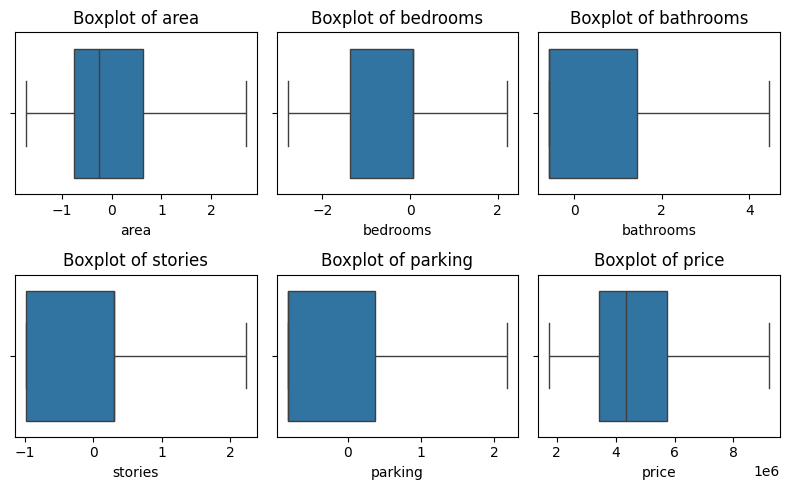

In [182]:
plt.figure(figsize=(8, 5))
for i, feature in enumerate(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

Histogram for Distribution of House Prices

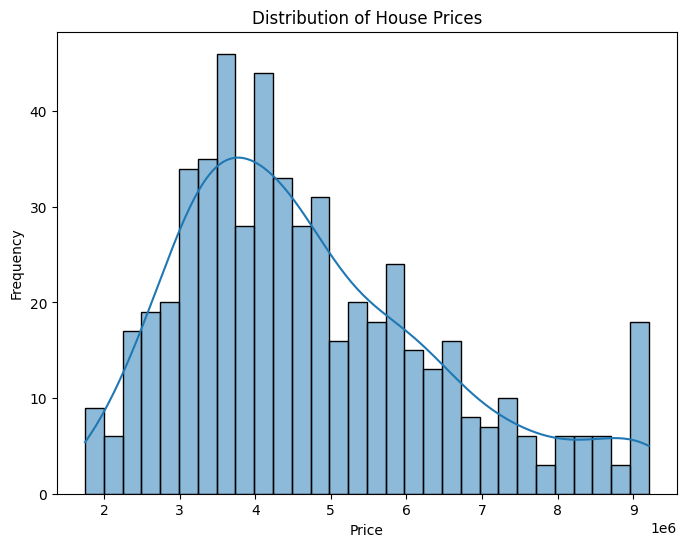

In [209]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Scatter Plot With Linear Regression

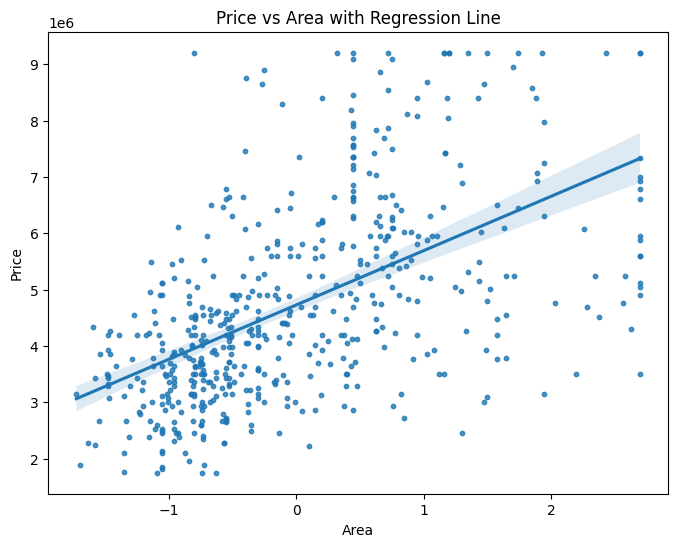

In [206]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df['area'], y=df['price'], scatter_kws={'s':10})
plt.title('Price vs Area with Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

FacetGrid for Price Distribution by Number of Bedrooms

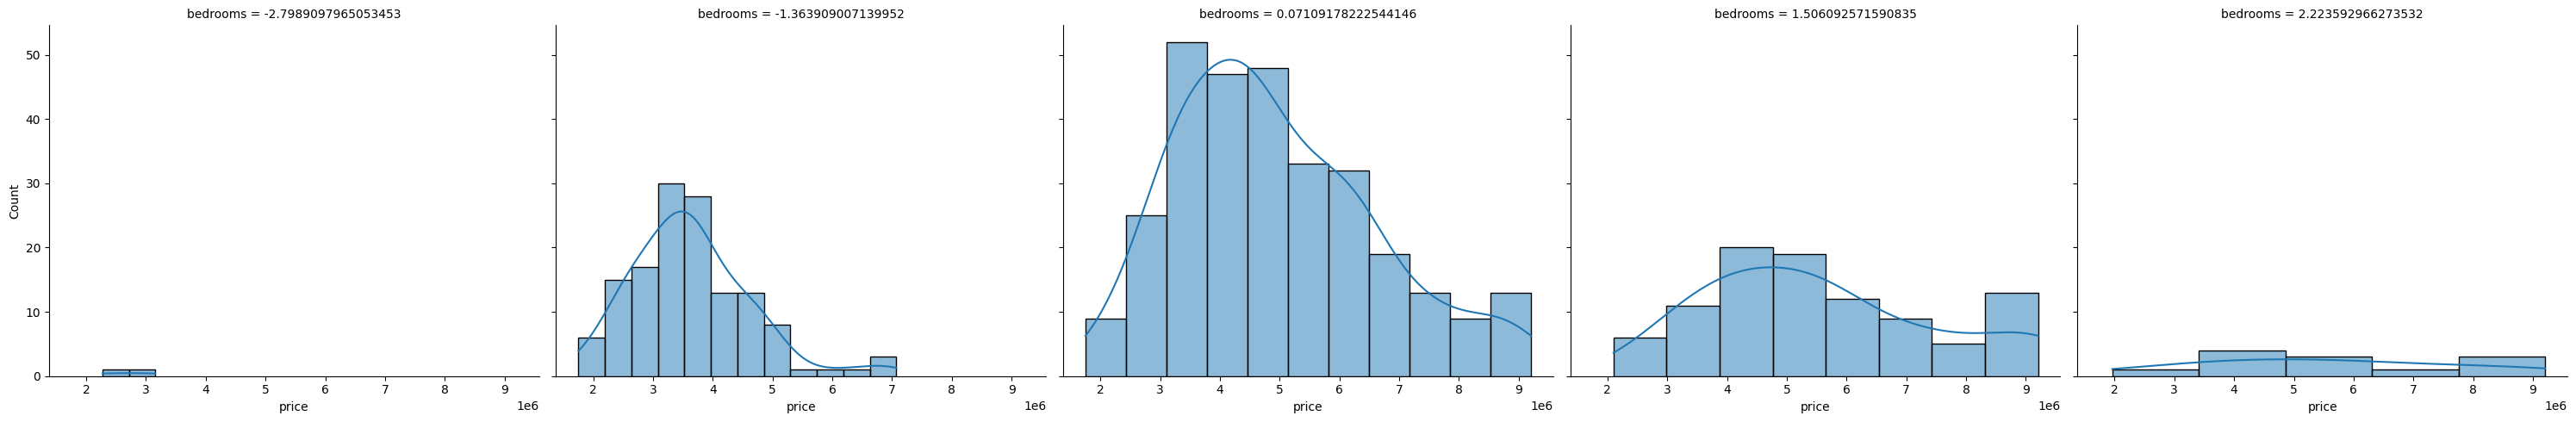

In [212]:
g = sns.FacetGrid(df, col='bedrooms', height=5, aspect=1.2)
g.map(sns.histplot, 'price', kde=True)
plt.show()

Correlation Matrix and PairPlot with price

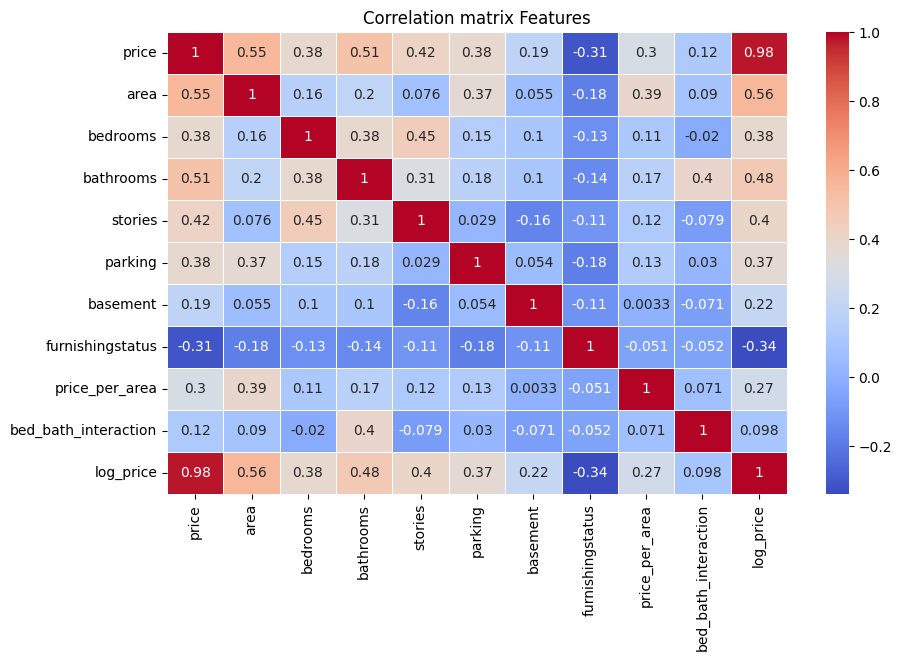

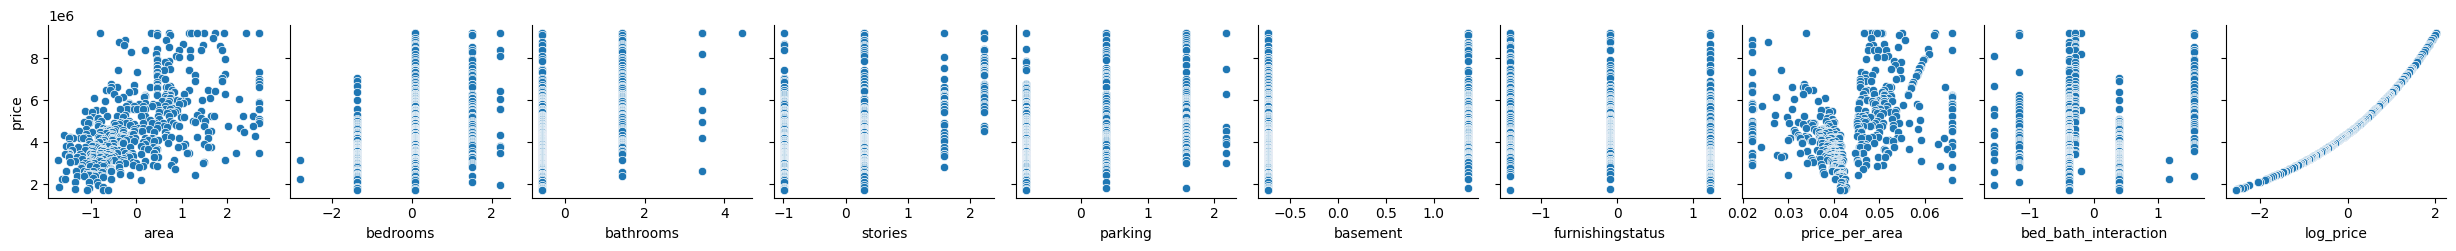

In [184]:
cols_to_corr =  df[['price','area','bedrooms','bathrooms','stories','parking','basement','furnishingstatus','price_per_area','bed_bath_interaction','log_price']]

correlation_matrix = cols_to_corr.corr()

plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix,annot = True,lw = 0.5, cmap = 'coolwarm')
plt.title('Correlation matrix Features')
plt.show()

sns.pairplot(cols_to_corr,y_vars = 'price', x_vars = ['area','bedrooms','bathrooms','stories','parking','basement','furnishingstatus','price_per_area','bed_bath_interaction','log_price'], kind = 'scatter')
plt.show()

In conclusion of correlation matrix and pairplot with price :


*  Area and log price has strong positive correlation
*  Bedrooms, bathrooms, stories and etc has moderate positive correlation
*  parking and furnishingstatus has weak correlation

***MODEL TRAINING***

In [185]:
X = df[['area','bedrooms','bathrooms','stories','parking','price_per_area','bed_bath_interaction','log_price','basement','furnishingstatus']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [186]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [187]:
model.coef_, model.intercept_

(array([   7369.4122213 ,  -11919.93224566,   83027.43710477,
          29596.98912986,   31243.9351758 , 3564530.09616135,
          10226.90314142, 1657620.95290236,  -32857.83587767,
          44446.84197543]),
 4553966.150484278)

**MODEL EVALUATION**

In [188]:
y_pred = model.predict(X_test)

In [189]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 186712020979.2307
Root Mean Squared Error (RMSE): 432101.86412376276
R-squared (R²): 0.9537829163090474


In [194]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 235255200.2090012
Root Mean Squared Error (RMSE): 15338.031171209726
R-squared (R²): 0.9999417669563011


Visualization of Actual vs. Predicted Values

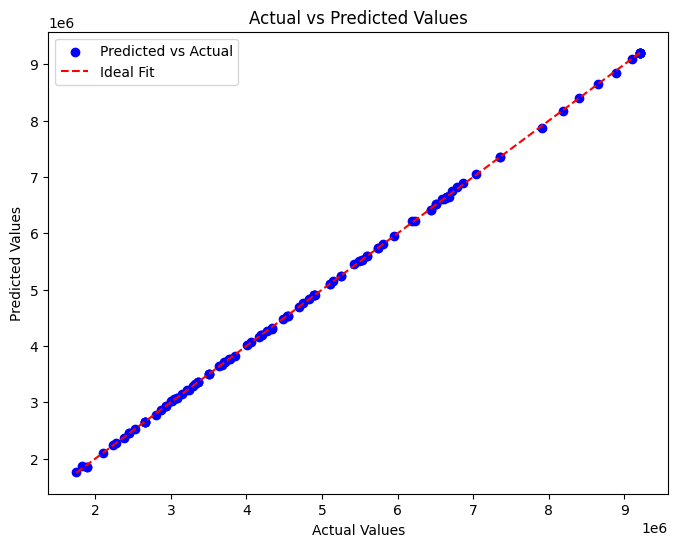

In [214]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
